In [2]:
#import eveerything that needed
import re
import pandas as pd
import nltk
from nltk.stem import PorterStemmer as ps
from nltk.corpus import stopwords
import datetime
import string
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
plotly.tools.set_credentials_file(username='FangzhengZhang', api_key='JCzdvumGOr8rCKHaeeeK')

In [3]:
#IO data 
table = pd.read_csv('employee_reviews.csv')
table

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...
5,6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5.0,4.0,4.0,4.0,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...
6,7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5.0,5.0,4.0,4.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
7,8,google,none,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
8,9,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
9,10,google,none,"Dec 9, 2018",Current Employee - Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,none,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


# Question 1

In [4]:
#print all the important info
company_set = set(table.company)
company_table_dic = {}
company_name_tuple = ('overall','amazon','google','apple','facebook','microsoft','netflix')
amazon_table = table[table.company == 'amazon']
google_table = table[table.company == 'google']
apple_table = table[table.company == 'apple']
facebook_table = table[table.company == 'facebook']
microsoft_table = table[table.company == 'microsoft']
netflix_table = table[table.company == 'netflix']
company_table_dic[company_name_tuple[0]] = table
company_table_dic[company_name_tuple[1]] = amazon_table
company_table_dic[company_name_tuple[2]] = google_table
company_table_dic[company_name_tuple[3]] = apple_table
company_table_dic[company_name_tuple[4]] = facebook_table
company_table_dic[company_name_tuple[5]] = microsoft_table
company_table_dic[company_name_tuple[6]] = netflix_table


In [5]:
#plot the number of reviews for each company 
review_count_dic = {}
review_count_dic['amazon'] = len(amazon_table)
review_count_dic['apple'] = len(apple_table) 
review_count_dic['facebook'] = len(facebook_table)
review_count_dic['google'] = len(google_table)
review_count_dic['microsoft'] = len(microsoft_table)
review_count_dic['netflix'] = len(netflix_table)


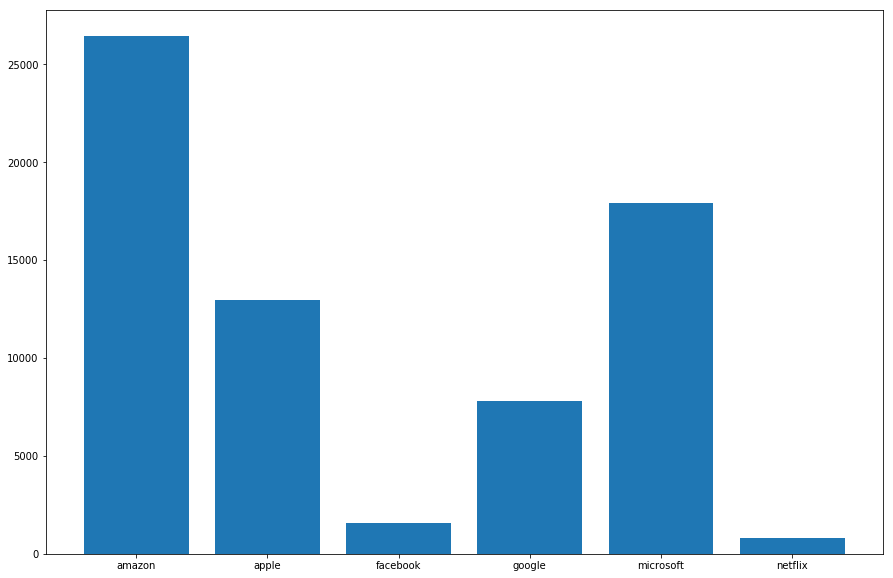

In [6]:
#plot the number of review for each company
height = list(review_count_dic.values())
bars = list(review_count_dic.keys())
y_pos = np.arange(len(bars))
plt.figure(figsize=(15,10))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)


# Show graphic
plt.show()


In [7]:
date_look_up_dic = {"Jan": 1 ,"Feb": 2 ,"Mar": 3 ,"Apr": 4, "May": 5, "Jun": 6,"Jul": 7,"Aug": 8,"Sep": 9,"Oct": 10,"Nov": 11,"Dec": 12}
def change_date_format(in_str):
    '''Dec 11, 2018  ->  2018 12 11'''
    str_part = re.split(' |, ',in_str)
    r_str = ''+ str_part[3] + '-' + str(date_look_up_dic[str_part[1]]) + '-' + str_part[2]
    try:
        date_time_obj = datetime.datetime.strptime(r_str, '%Y-%m-%d')
    except ValueError:
        date_time_obj = datetime.datetime.strptime("6666-6-6", '%Y-%m-%d')
    date_time_obj = date_time_obj.date()
    return date_time_obj
    
def clear_date_none(temp_table):
    return_table = temp_table[temp_table.dates != 'None']
    #todo change the date format 
    return_table.dates = return_table.dates.map(change_date_format)
    return_table = return_table.sort_values(by='dates', ascending=True)
    return return_table

In [8]:
#clean the tables and sort them by date
amazon_date_clean_table = clear_date_none(amazon_table)
apple_date_clean_table = clear_date_none(apple_table)
facebook_date_clean_table = clear_date_none(facebook_table)
google_date_clean_table = clear_date_none(google_table)
microsoft_date_clean_table = clear_date_none(microsoft_table)
netflix_date_clean_table = clear_date_none(netflix_table)


c:\users\fangz\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [9]:
def count_dates(temp_table):
    temp_time_dic = {}
    for i in range(len(temp_table)):
        row = temp_table.iloc[i]
        if str(row.dates) not in temp_time_dic:
            temp_time_dic[str(row.dates)] = 1
        else:
            temp_time_dic[str(row.dates)]+=1
    return temp_time_dic

In [10]:
#big file, take long time to run!!!!
#count the time line 
amazon_time_line_dic = count_dates(amazon_date_clean_table)
apple_time_line_dic = count_dates(apple_date_clean_table)
facebook_time_line_dic = count_dates(facebook_date_clean_table)
google_time_line_dic = count_dates(google_date_clean_table)
microsoft_time_line_dic = count_dates(microsoft_date_clean_table)
netflix_time_line_dic = count_dates(netflix_date_clean_table)


In [11]:
amazon_date_review_table = pd.DataFrame.from_dict({'Dates':list(amazon_time_line_dic.keys()) , 'Amazon_Reviews': list(amazon_time_line_dic.values())})
apple_date_review_table = pd.DataFrame.from_dict({'Dates':list(apple_time_line_dic.keys()) , 'Apple_Reviews': list(apple_time_line_dic.values())})
facebook_date_review_table = pd.DataFrame.from_dict({'Dates':list(facebook_time_line_dic.keys()) , 'Facebook_Reviews': list(facebook_time_line_dic.values())})
google_date_review_table = pd.DataFrame.from_dict({'Dates':list(google_time_line_dic.keys()) , 'Google_Reviews': list(google_time_line_dic.values())})
microsoft_date_review_table = pd.DataFrame.from_dict({'Dates':list(microsoft_time_line_dic.keys()) , 'Microsoft_Reviews': list(microsoft_time_line_dic.values())})
netflix_date_review_table = pd.DataFrame.from_dict({'Dates':list(netflix_time_line_dic.keys()) , 'Netflix_Reviews': list(netflix_time_line_dic.values())})

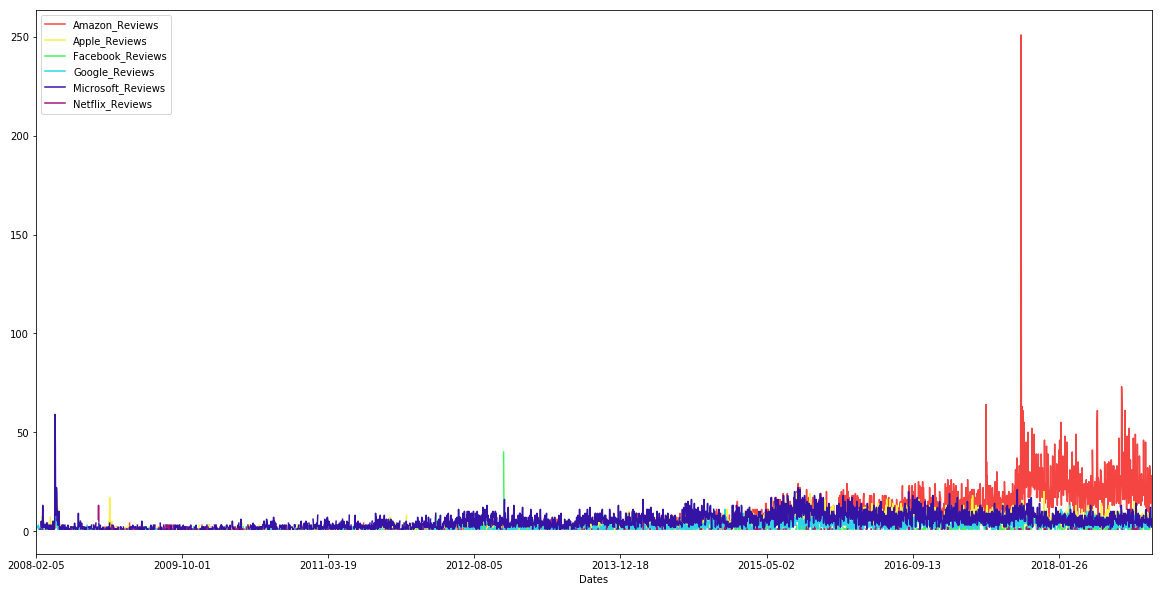

In [12]:
total_date_review_table = pd.merge(amazon_date_review_table, apple_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, facebook_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, google_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, microsoft_date_review_table, how='outer', on=['Dates'])
total_date_review_table = pd.merge(total_date_review_table, netflix_date_review_table, how='outer', on=['Dates'])
total_date_review_table = total_date_review_table.sort_values(by=['Dates'])
total_date_review_table = total_date_review_table.iloc[:-1]
total_date_review_table.iloc[1:].plot(kind = 'line',x='Dates', y=['Amazon_Reviews', 'Apple_Reviews','Facebook_Reviews', 'Google_Reviews','Microsoft_Reviews', 'Netflix_Reviews'],
                                      figsize=(20,10),color=['#f44542','#f4f141','#41f45e','#2cd5e8','#3513a5','#a5127b'])

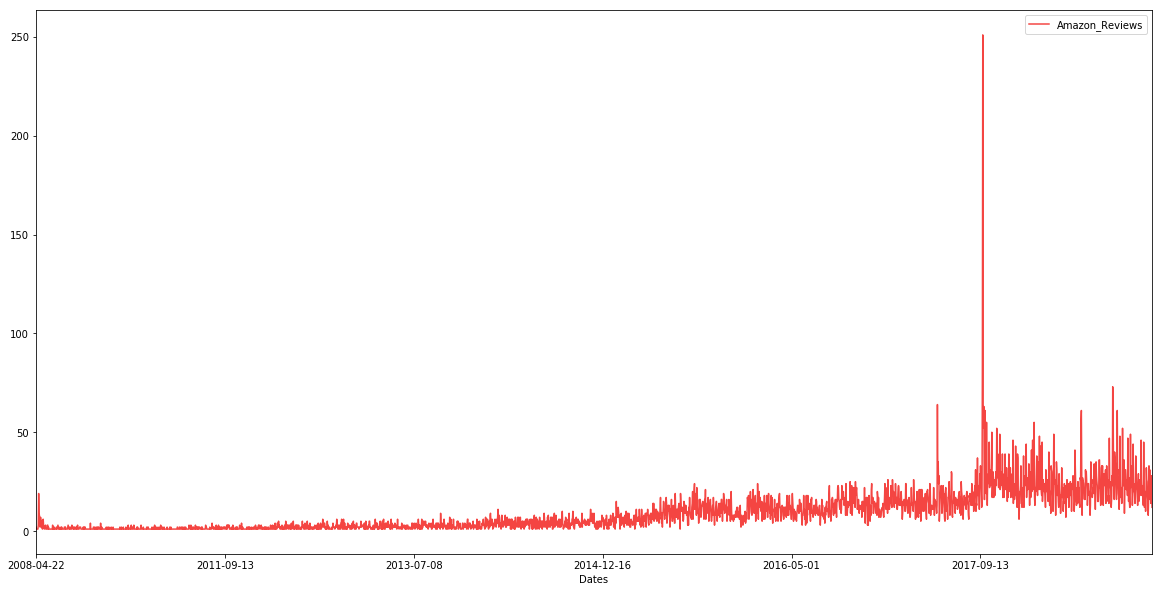

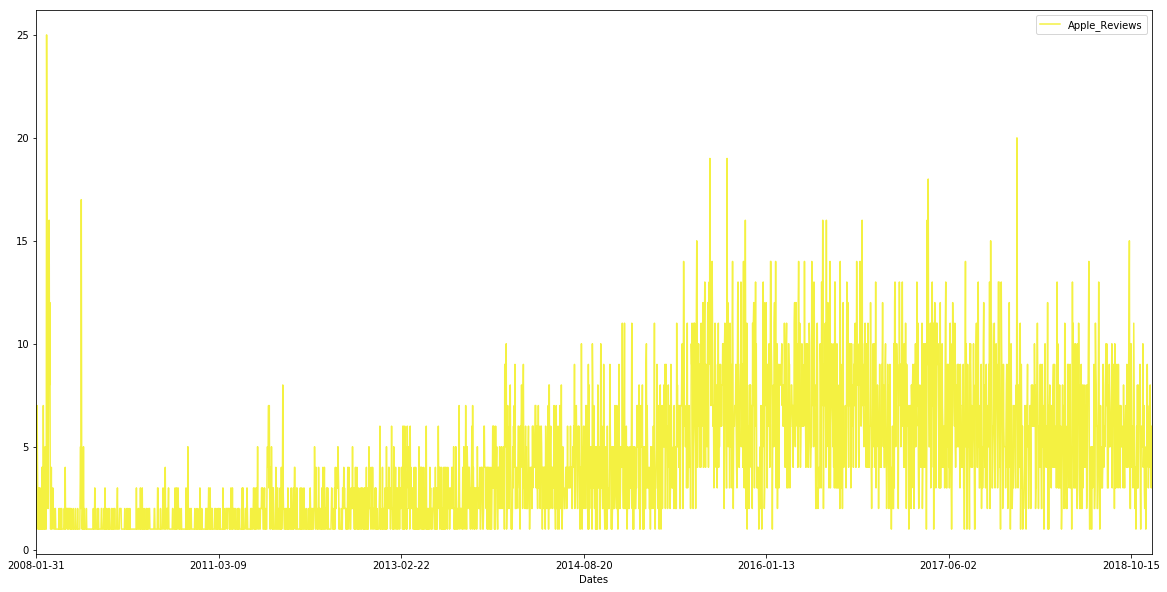

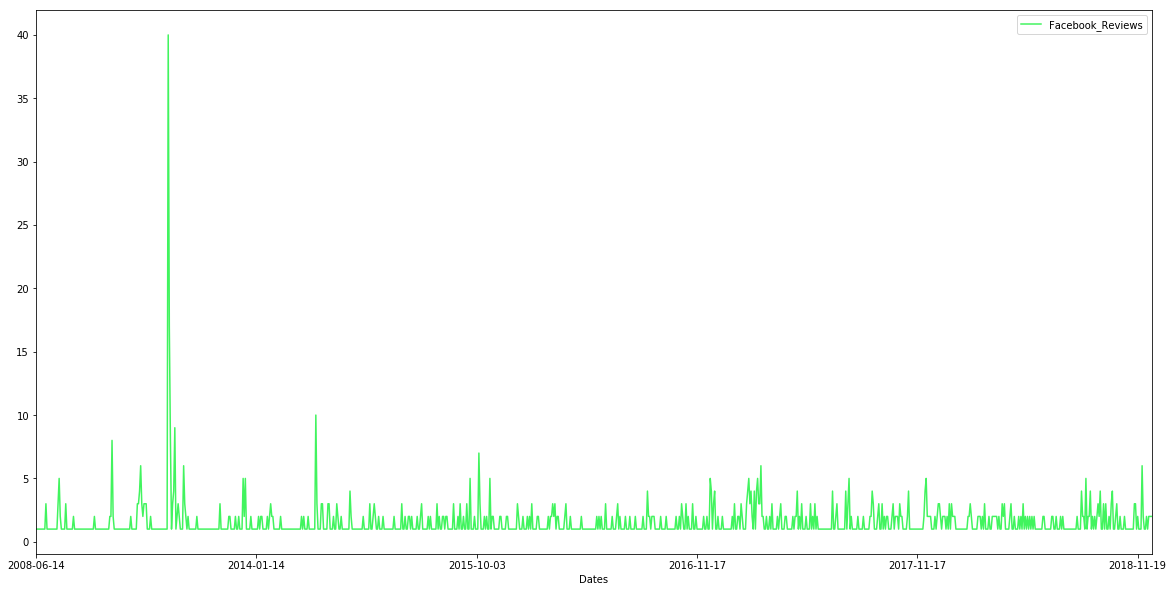

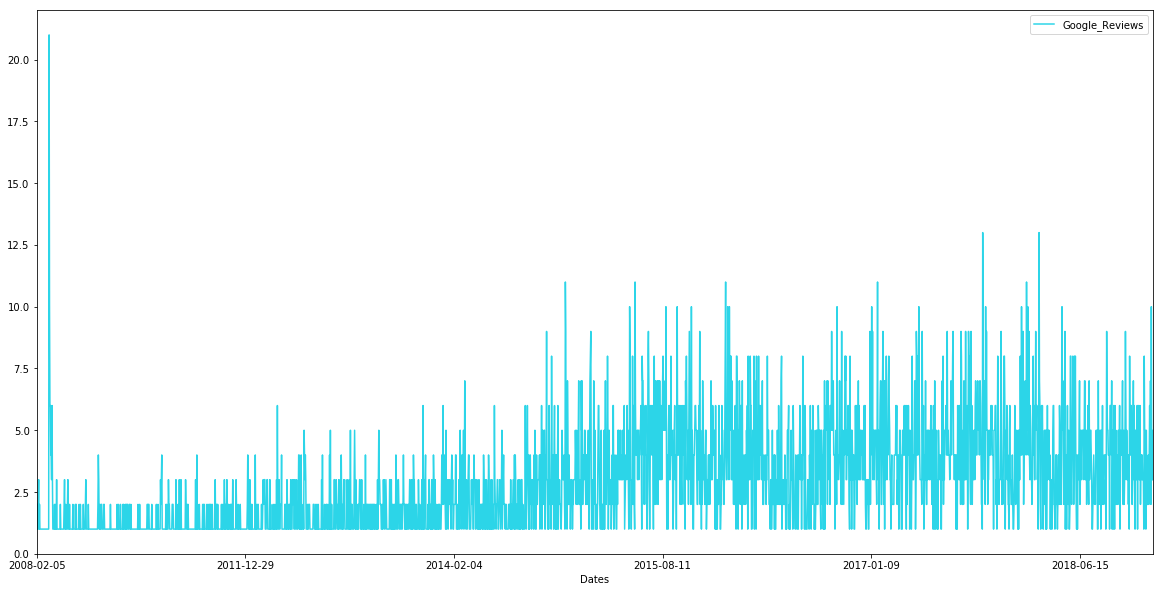

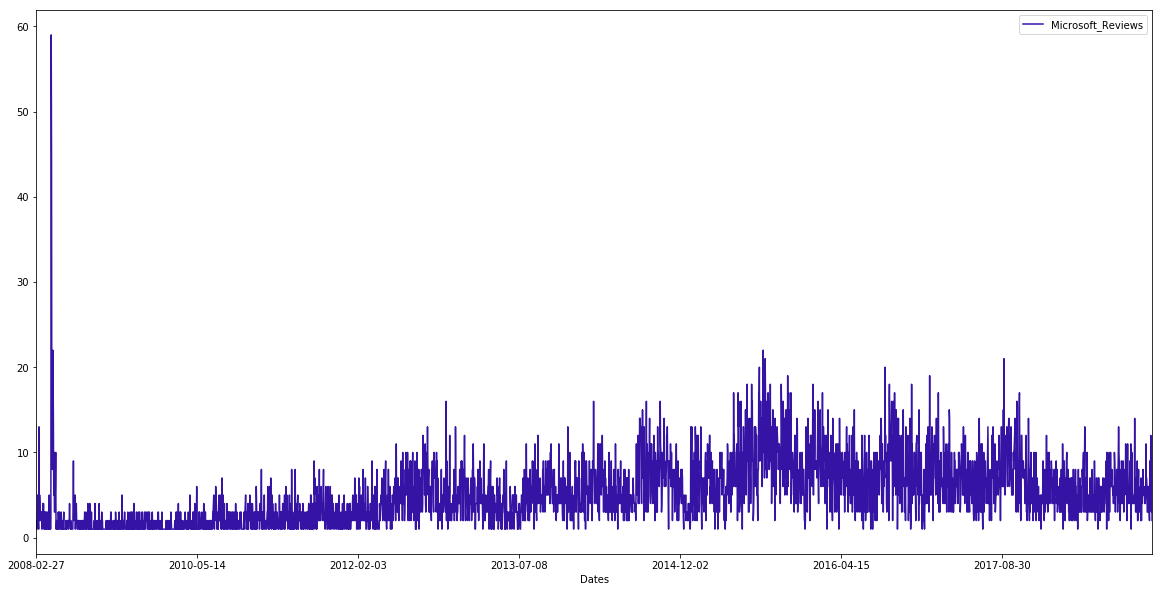

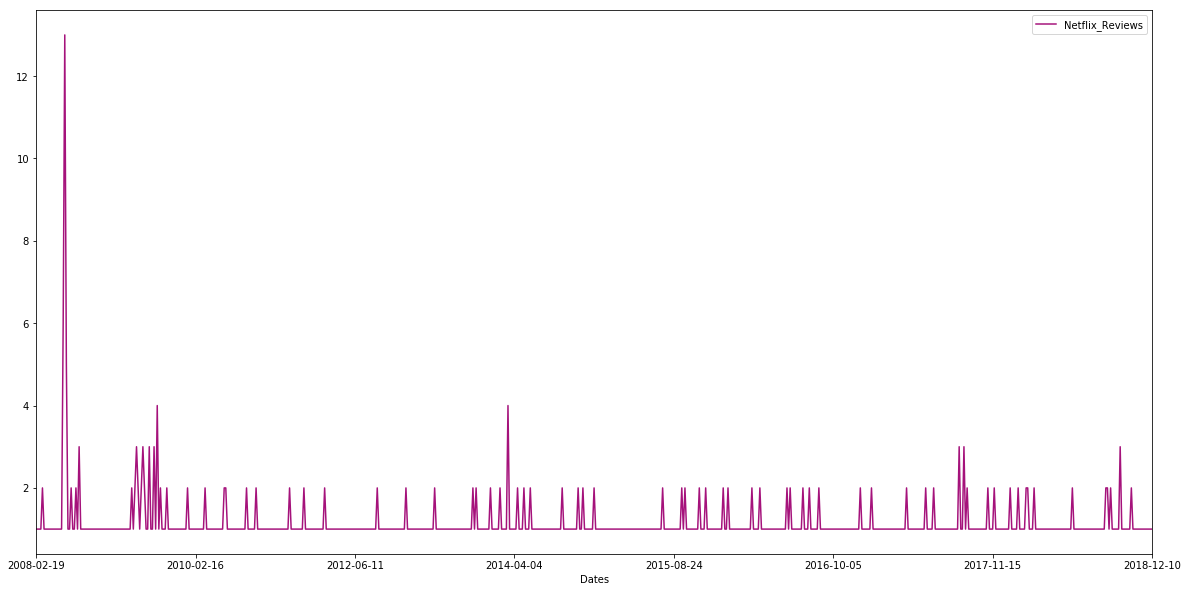

In [13]:
amazon_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Amazon_Reviews',figsize=(20,10),color='#f44542')
apple_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Apple_Reviews',figsize=(20,10),color='#f4f141')
facebook_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Facebook_Reviews',figsize=(20,10),color='#41f45e')
google_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Google_Reviews',figsize=(20,10),color='#2cd5e8')
microsoft_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Microsoft_Reviews',figsize=(20,10),color='#3513a5')
netflix_date_review_table.iloc[:-1].plot(kind = 'line',x='Dates', y='Netflix_Reviews',figsize=(20,10),color='#a5127b')

# Question 2

# Question 3

In [14]:
company_name_tuple

('overall', 'amazon', 'google', 'apple', 'facebook', 'microsoft', 'netflix')

In [15]:
pro_str_list_dic = {}
con_str_list_dic = {}
for name in company_name_tuple:
    pro_str_list_dic[name] = list(company_table_dic[name].pros)
    con_str_list_dic[name] = list(company_table_dic[name].cons)


pro_str_list_dic['netflix']

['Open communication. Top of market pay. Extremely good tech.',
 '- Paycheck - So many good people - Such a great service - Hope',
 'Great personalities, great work culture, free food, great tech help',
 'Excellent Projects with Pros from throughout the Entertainment Industry',
 'It was great and i loved it',
 'Many great people to work with and learn from',
 "When they say that Netflix chooses stunning colleagues, they are not kidding: I am constantly impressed with the smart, thoughtful people I work with on a daily basis. I love the company's focus on Inclusion & Diversity (and, I honestly notice it often, by looking around the room and seeing faces like mine in every meeting), and I am continually impressed at how the company adheres to these principles. The transparency is usually great, and it's fun to be a part of an exciting, growing company. The salary is exceptional, and the benefits are also excellent (note: hourly employees get slightly less in terms of benefits, but it's s

In [16]:
#it is core function to do big data:

stemmer = ps()


def remove_non_english_words(words):
    clean_words = []
    englis_words = nltk.corpus.words.words('en')
    for word in words:
        if word in englis_words:
            clean_words.append(word)
    return clean_words
    

def parse_as_words(sentence):
    return_list = []
    sentence = sentence.lower()
    sentence = sentence.translate(str.maketrans({key: None for key in string.punctuation}))
    words = nltk.word_tokenize(sentence)
    for word in words:
        if not word.isdigit():
            return_list.append(word)
    return return_list

def parse_as_root_phrase(sentence):
    phrase_list = []
    words = parse_as_words(sentence)
    words = back_to_root(words)
    #words = remove_non_english_words(words)
    tag_list = nltk.pos_tag(words)
    #get the phrases
    for i in range(len(tag_list)):
        if i+3 < len(tag_list):
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "CC"and tag_list[i+3][1] == "NN":
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0])+ ' ' + str(tag_list[i+3][0]))
        
        if i+2 < len(tag_list):
            # at least 3 words left
            #(tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "NN") or 
            if (tag_list[i][1] == "NN" and tag_list[i+1][1] == "VBP" and tag_list[i+2][1] == "JJ"):
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0]))
           
        if i+1 < len(tag_list):
            # at least 2 words left
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN":
                phrase_list.append(str(tag_list[i][0] + ' ' + str(tag_list[i+1][0])))
    
    return phrase_list

def parse_as_phrase(sentence):
    phrase_list = []
    words = parse_as_words(sentence)
    #words = back_to_root(words)
    #words = remove_non_english_words(words)
    tag_list = nltk.pos_tag(words)
    #get the phrases
    for i in range(len(tag_list)):
        if i+3 < len(tag_list):
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "CC"and tag_list[i+3][1] == "NN":
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0])+ ' ' + str(tag_list[i+3][0]))
        
        if i+2 < len(tag_list):
            # at least 3 words left
            #(tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN" and tag_list[i+2][1] == "NN") or 
            if (tag_list[i][1] == "NN" and tag_list[i+1][1] == "VBP" and tag_list[i+2][1] == "JJ"):
                phrase_list.append(str(tag_list[i][0]) + ' ' + str(tag_list[i+1][0]) + ' ' + str(tag_list[i+2][0]))
           
        if i+1 < len(tag_list):
            # at least 2 words left
            if tag_list[i][1] == "JJ" and tag_list[i+1][1] == "NN":
                phrase_list.append(str(tag_list[i][0] + ' ' + str(tag_list[i+1][0])))
    
    return phrase_list





def back_to_root(words):
    return list(map(stemmer.stem,words))


def count_words(words):
    temp_word_count_dic = {}
    for word in words:
        if word not in temp_word_count_dic:
            temp_word_count_dic[word] = 1
        else:
            temp_word_count_dic[word] += 1
    return temp_word_count_dic



def parse_data_clean_and_count(sentence_list,isroot,isphrase,isrootphrase):
    words_counter_dic = {}
    if not isphrase:
        list_of_words_list = list(map(parse_as_words, sentence_list))
    elif isrootphrase:
        list_of_words_list = list(map(parse_as_root_phrase, sentence_list))
    else:
        list_of_words_list = list(map(parse_as_phrase, sentence_list))
        
        
    if isroot and not isphrase:
        list_of_ready_to_count_list = list(map(back_to_root, list_of_words_list))
    else:
        list_of_ready_to_count_list = list_of_words_list
        
    counter_dic_list =  list(map(count_words , list_of_ready_to_count_list))
    
    for dic in counter_dic_list:
        for key in dic:
            if key not in words_counter_dic:
                words_counter_dic[key] = dic[key]
            else:
                words_counter_dic[key] += dic[key]
    return words_counter_dic


def remove_stopWords_from_word_dic(input_dic):
    return_dic = {}
    stop_words = set(stopwords.words('english'))
    for key in input_dic:
        if key not in stop_words:
            return_dic[key] = input_dic[key]
    return return_dic

def remove_non_englist_words_from_word_dic(input_dic):
    """
    If the keys (words) in input_dic are not in root form, it may delete wrong words
    such as "Benefits"
    """
    return_dic = {}
    englis_words = nltk.corpus.words.words('en')
    for key in input_dic:
        if key in englis_words:
            return_dic[key] = input_dic[key]
    return return_dic
    


In [17]:
# wrap up functions
def parse_data_as_words_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,False,False,False)
    
def parse_data_as_rootWords_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,True,False,False)
    
def parse_data_as_words_remove_stopWord_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,False,False,False)
    return remove_stopWords_from_word_dic(t)

def parse_data_as_rootwords_remove_stopWord_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,True,False,False)
    return remove_stopWords_from_word_dic(t)

def parse_data_as_words_remove_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,False,False,False)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_rootwords_remove_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,True,False,False)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_words_remove_sotpWord_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,False,False,False)
    t = remove_stopWords_from_word_dic(t)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_rootwords_remove_sotpWord_non_englist_words_count(sentence_list):
    t = parse_data_clean_and_count(sentence_list,True,False,False)
    t = remove_stopWords_from_word_dic(t)
    return remove_non_englist_words_from_word_dic(t)

def parse_data_as_root_phrase_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,False,True,True)

def parse_data_as_phrase_count(sentence_list):
    return parse_data_clean_and_count(sentence_list,False,True,False)


In [18]:
#start to count all words
pro_word_count_dic_of_dic = {}
con_word_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_word_count_dic_of_dic[name] = parse_data_as_words_count(pro_str_list_dic[name])
    con_word_count_dic_of_dic[name] = parse_data_as_words_count(con_str_list_dic[name])


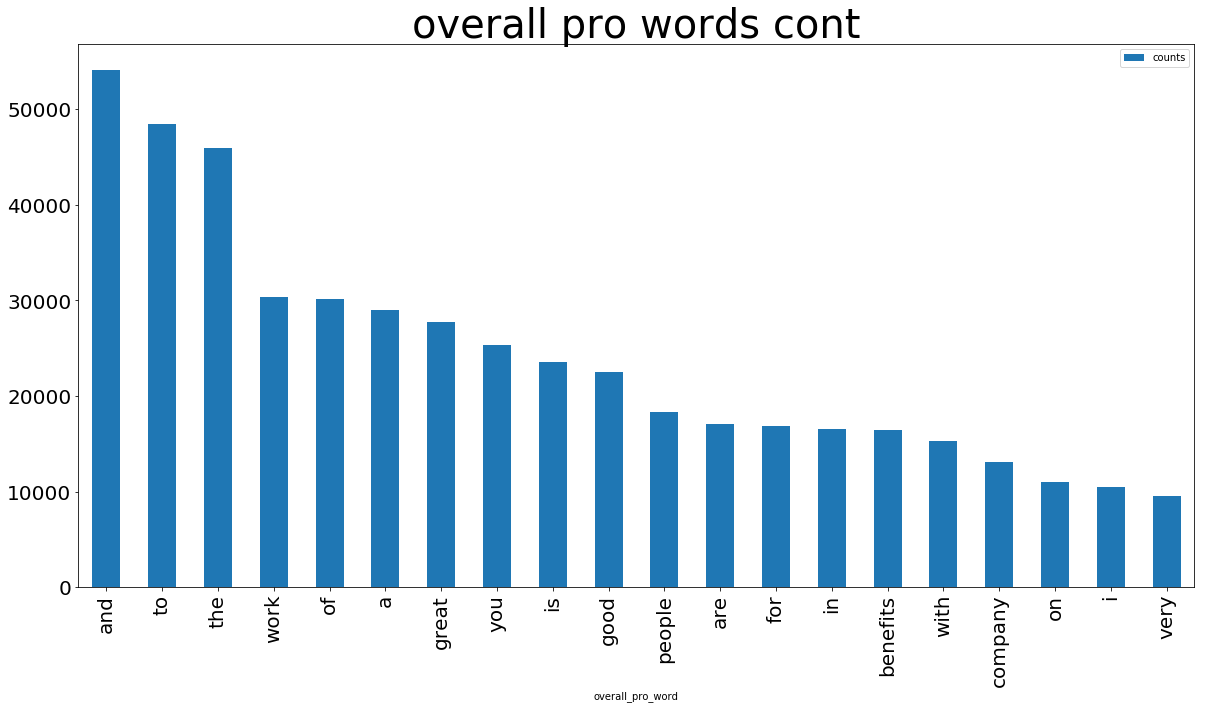

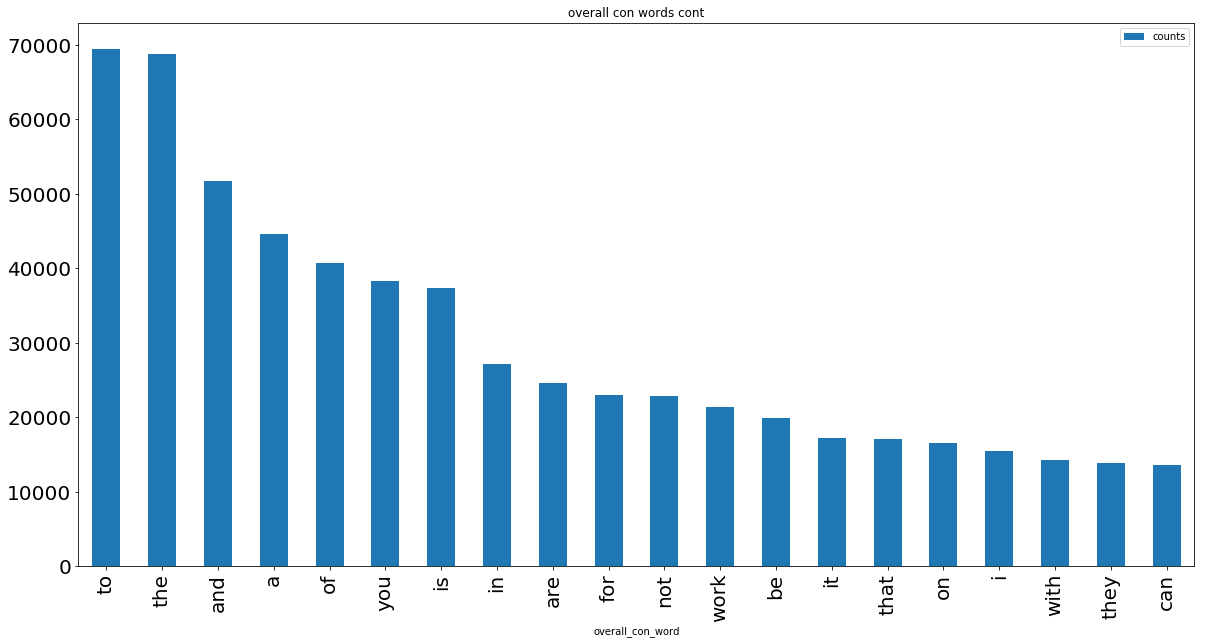

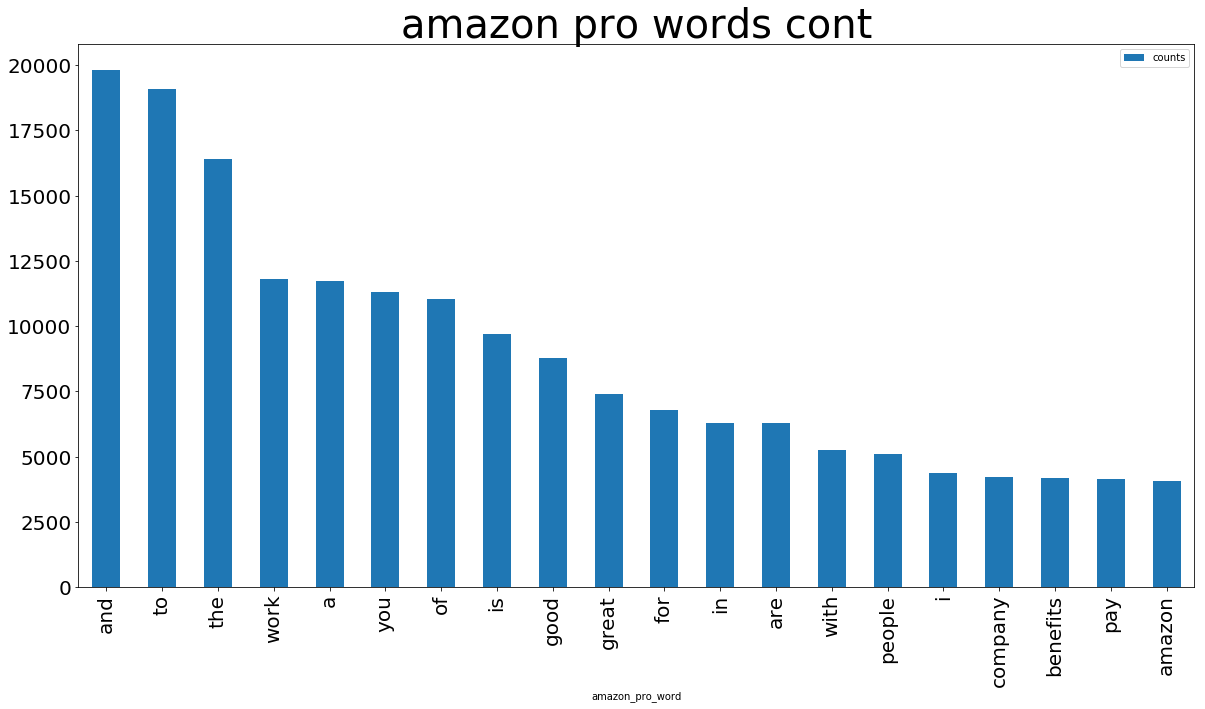

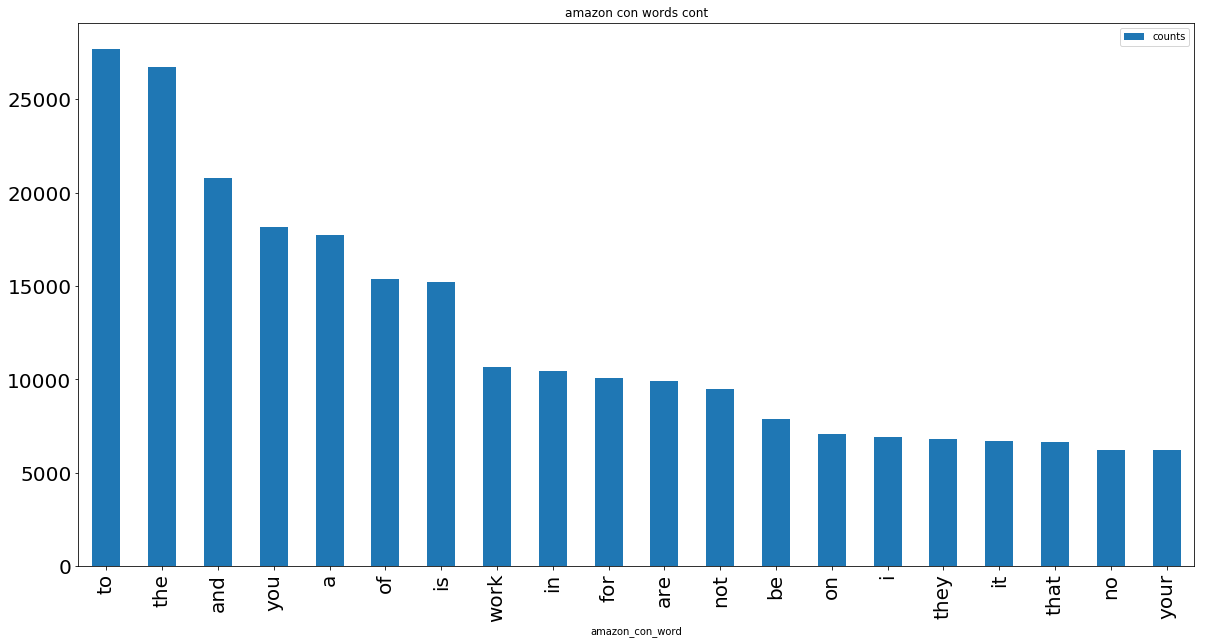

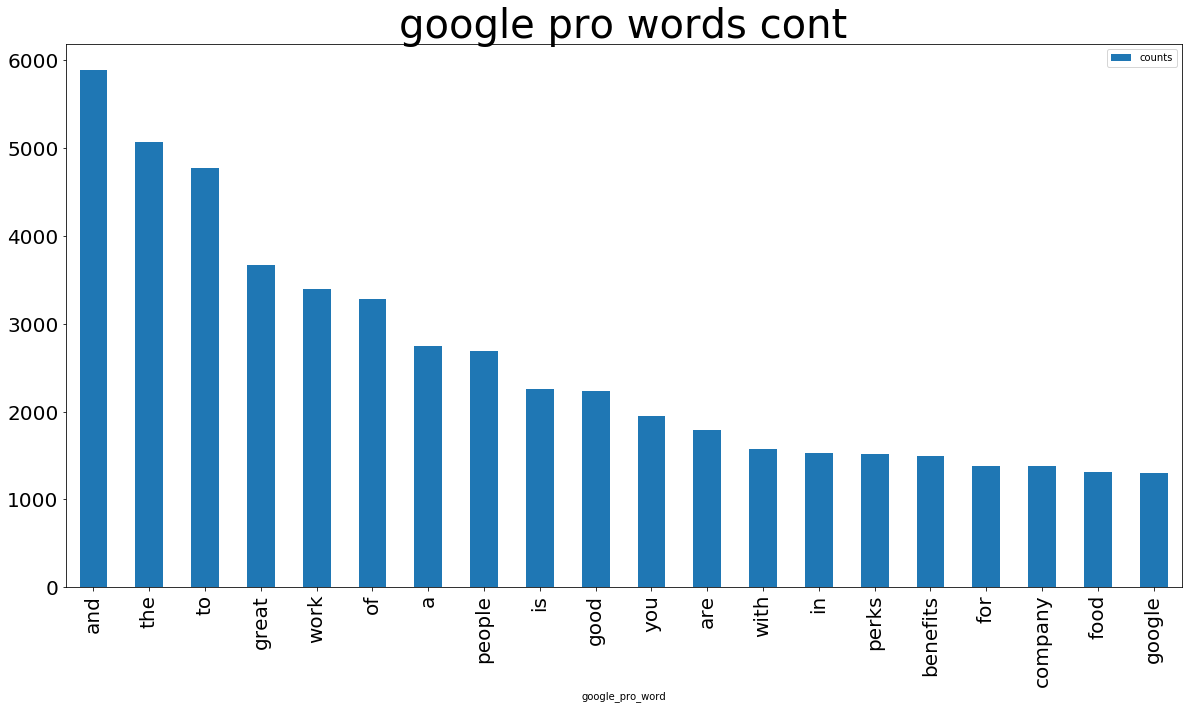

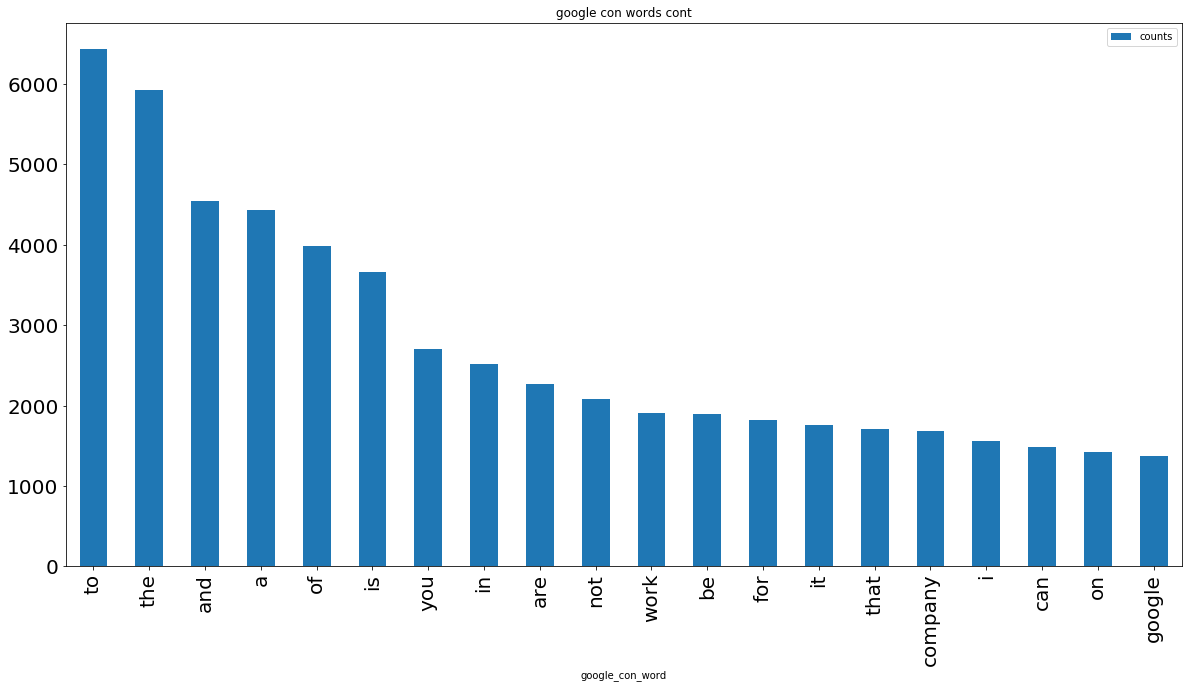

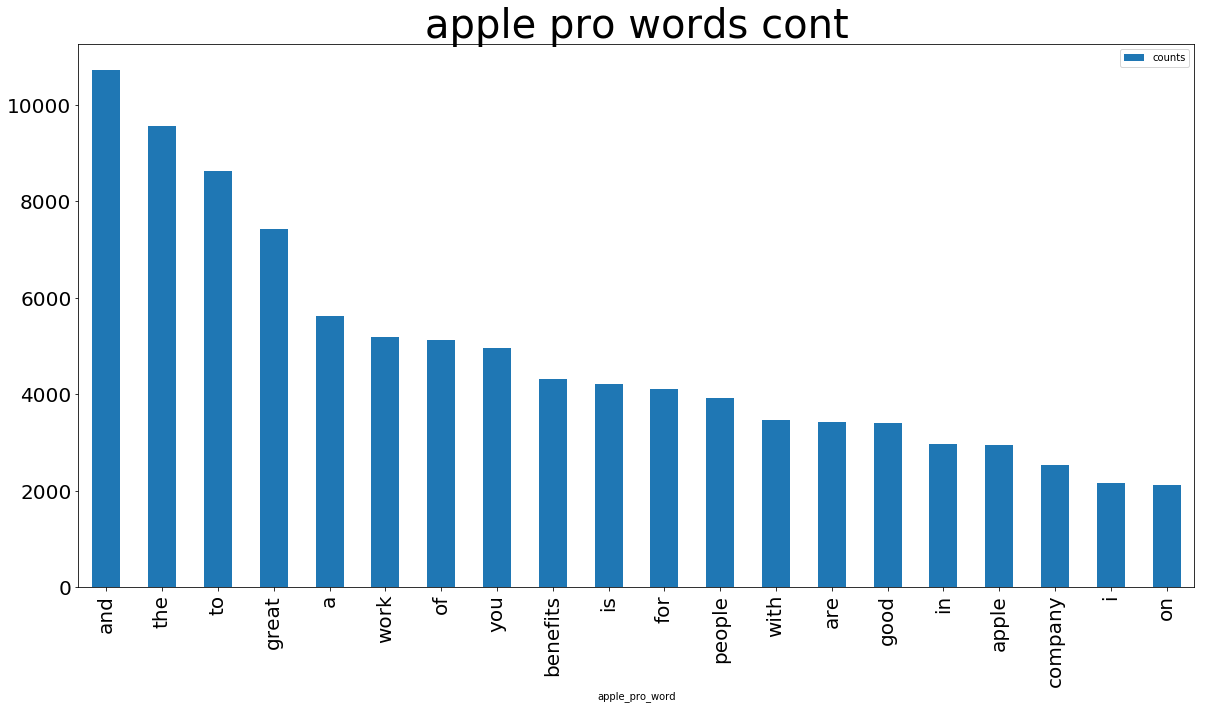

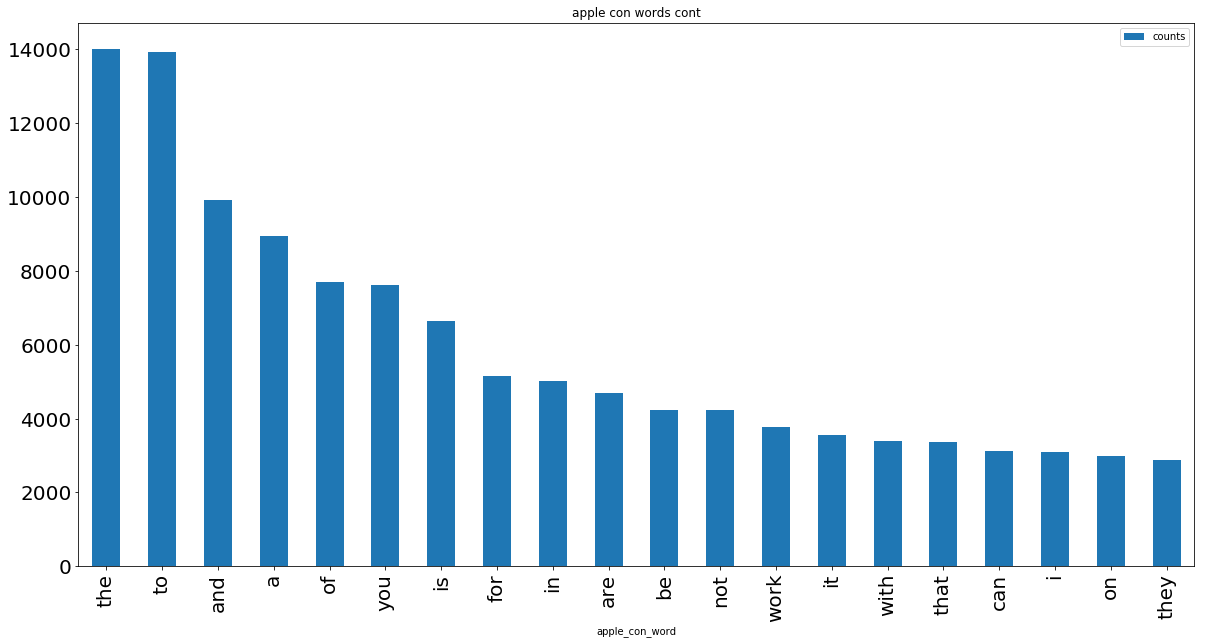

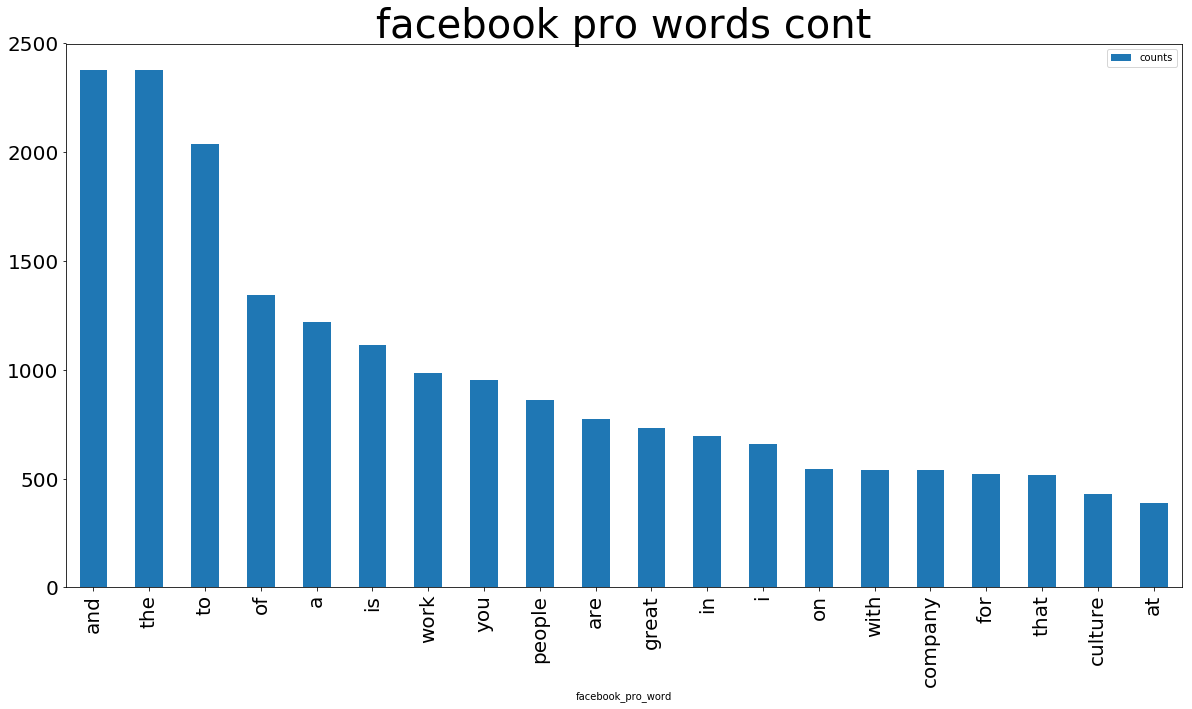

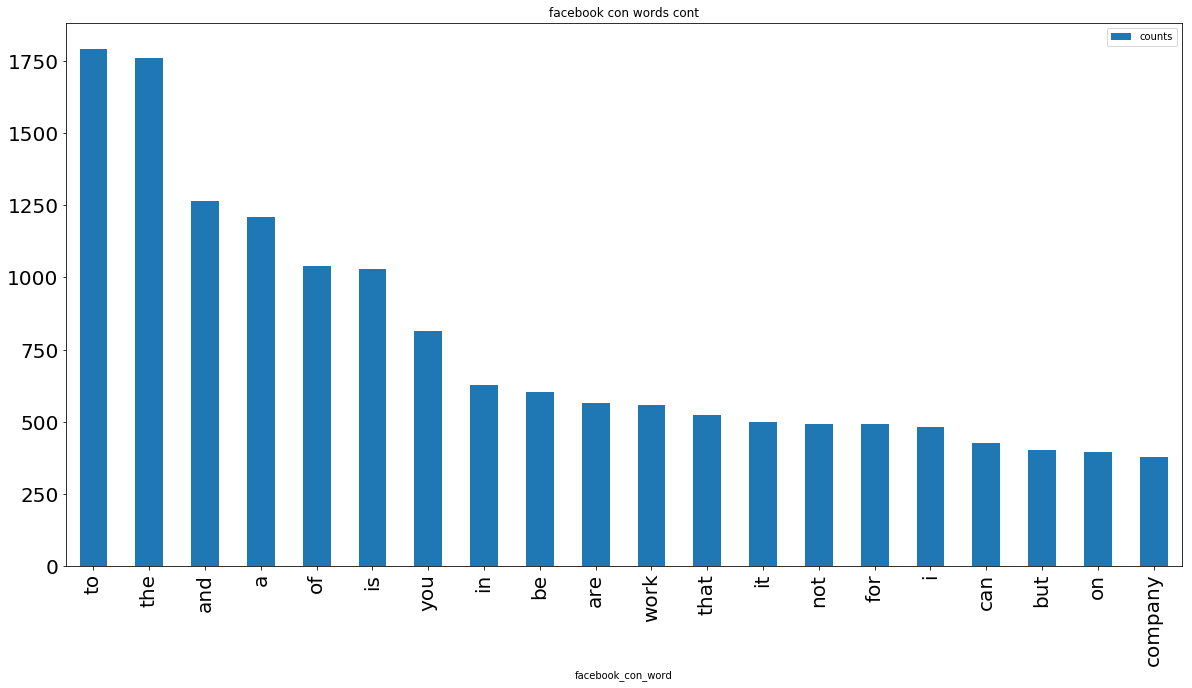

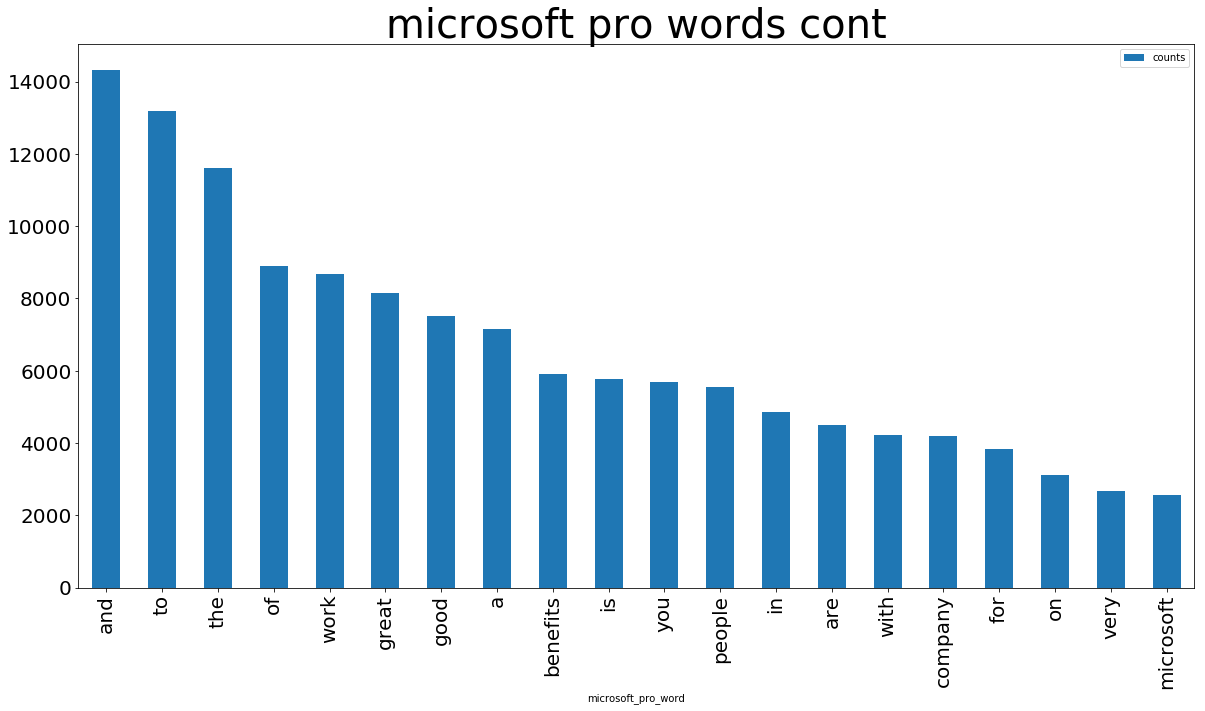

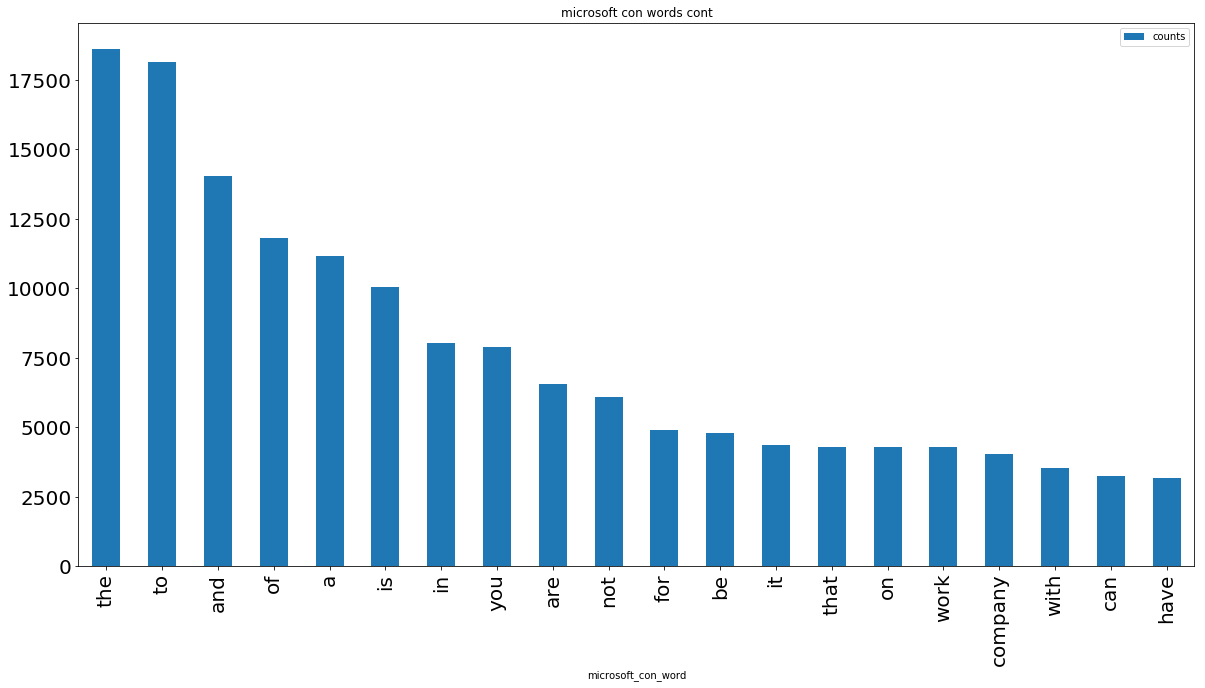

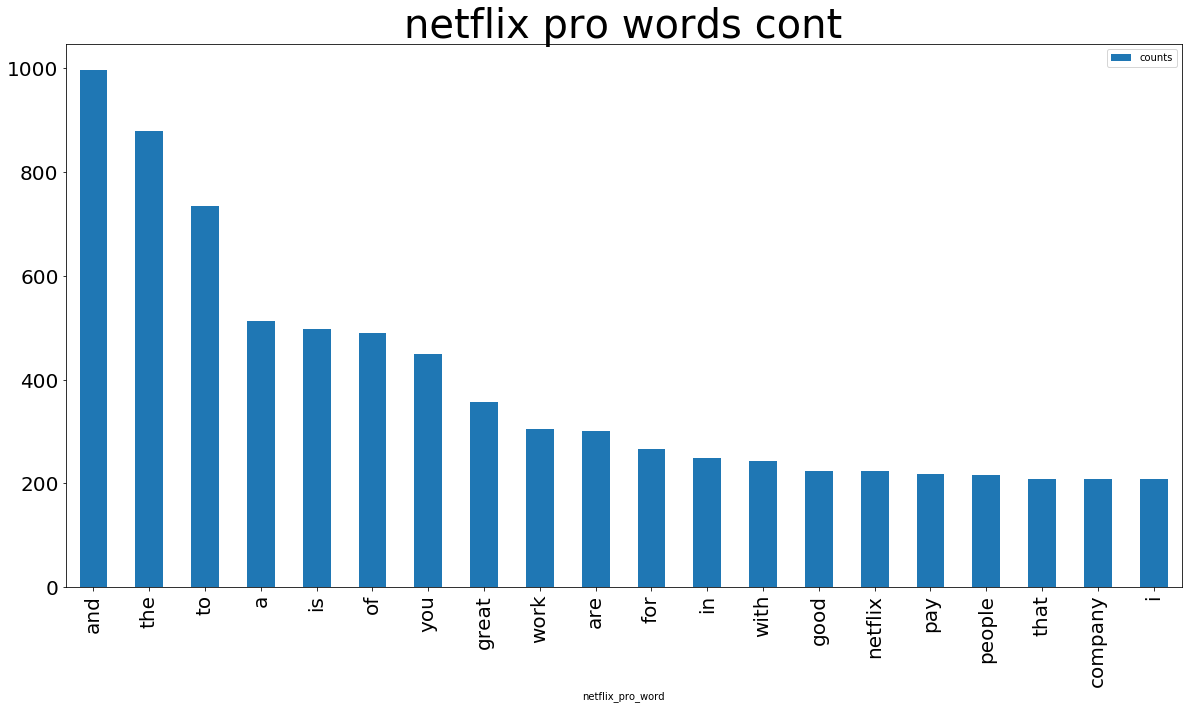

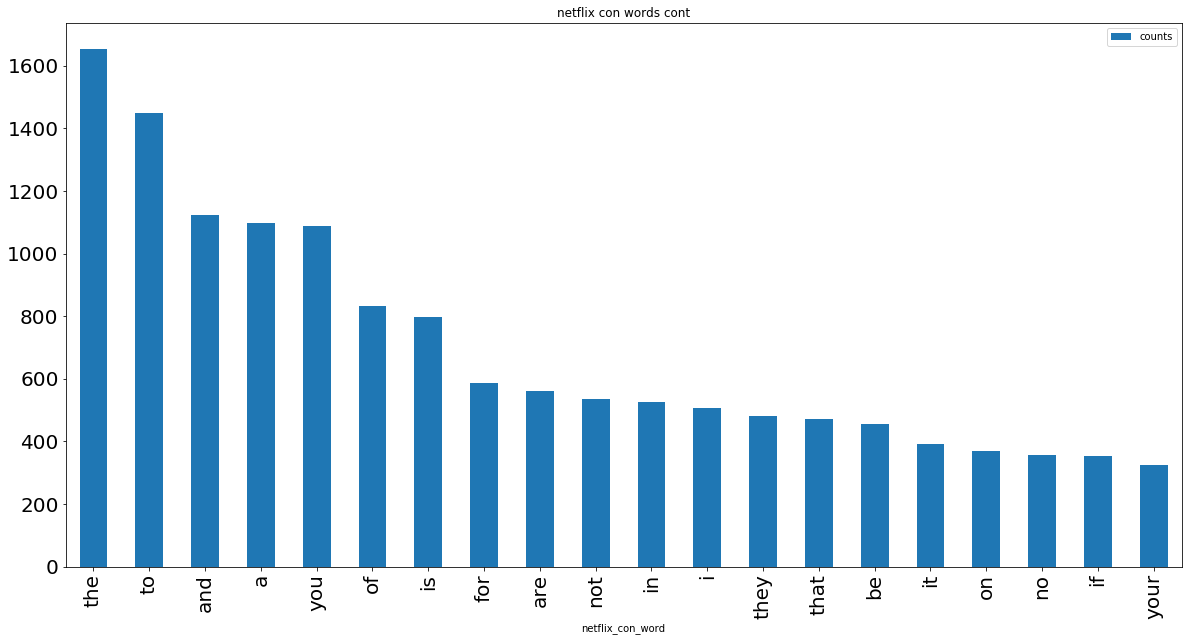

In [26]:
#build data fram to result of count all words
pro_word_count_table_dic = {}
con_word_count_table_dic = {}

for name in company_name_tuple:
    pro_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_pro_word'):list(pro_word_count_dic_of_dic[name].keys()) , 'counts': list(pro_word_count_dic_of_dic[name].values())})
    con_word_count_table_dic[name] = pd.DataFrame.from_dict({(name+'_con_word'):list(con_word_count_dic_of_dic[name].keys()) , 'counts': list(con_word_count_dic_of_dic[name].values())})
    pro_word_count_table_dic[name] = pro_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    con_word_count_table_dic[name] = con_word_count_table_dic[name].sort_values(by='counts', ascending=False)
    
    pro_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_pro_word', y='counts',title=name + " pro words cont",figsize=(20,10),fontsize=20).title.set_size(40)
    con_word_count_table_dic[name].iloc[0:20].plot(kind = 'bar',x=name+'_con_word', y='counts',title=name + " con words cont",figsize=(20,10),fontsize=20).title.set_size(40)
    
       
#pro_word_count_table_dic[company_name_tuple[0]].iloc[0:20].plot(kind = 'bar',x=company_name_tuple[0]+'_pro_word', y='counts',title=None,figsize=(20,10),fontsize=20)




In [23]:
#start to count non stop words
pro_word_remove_stopword_count_dic_of_dic = {}
con_word_remove_stopword_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_word_remove_stopword_count_dic_of_dic[name] = parse_data_as_words_remove_stopWord_count(pro_str_list_dic[name])
    con_word_remove_stopword_count_dic_of_dic[name] = parse_data_as_words_remove_stopWord_count(con_str_list_dic[name])


In [24]:
#start to count non stop root words
pro_rootword_remove_stopword_count_dic_of_dic = {}
con_rootword_remove_stopword_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_rootword_remove_stopword_count_dic_of_dic[name] = parse_data_as_rootwords_remove_stopWord_count(pro_str_list_dic[name])
    con_rootword_remove_stopword_count_dic_of_dic[name] = parse_data_as_rootwords_remove_stopWord_count(con_str_list_dic[name])


In [ ]:
#start to count root phrase
pro_root_phrase_count_dic_of_dic = {}
con_root_phrase_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_root_phrase_count_dic_of_dic[name] = parse_data_as_root_phrase_count(pro_str_list_dic[name])
    con_root_phrase_count_dic_of_dic[name] = parse_data_as_root_phrase_count(con_str_list_dic[name])

In [33]:
#start to count phrase
pro_phrase_count_dic_of_dic = {}
con_phrase_count_dic_of_dic = {}

for name in company_name_tuple:
    pro_phrase_count_dic_of_dic[name] = parse_data_as_phrase_count(pro_str_list_dic[name])
    con_phrase_count_dic_of_dic[name] = parse_data_as_phrase_count(con_str_list_dic[name])

In [34]:
pro_phrase_count_dic_of_dic

{'overall': {'main campus': 29,
  'gym access': 3,
  'free self': 3,
  'available bowling': 3,
  'exclusive employee': 3,
  'outdoor sport': 3,
  'free healthfitness': 3,
  'etc compensation': 1,
  'engineer youre': 5,
  'engineerdriven company': 6,
  'free breakfast': 35,
  'public library': 3,
  'overnight nature': 3,
  'i dont': 29,
  'huge diversity': 6,
  'independent journalism': 2,
  'vast majority': 18,
  'new project': 9,
  'open forum': 3,
  'fair game': 2,
  'amazon stream': 1,
  'general information': 1,
  'extra youll': 1,
  'doesnt matter': 8,
  'wont advance': 1,
  'big complaint': 1,
  'uber genius': 1,
  'bigtable youre': 1,
  'good coder': 2,
  'revolutionary code': 1,
  'minimum requirement but code': 1,
  'minimum requirement': 1,
  'tech lead': 4,
  'real point': 1,
  'wellregarded company': 2,
  'youll work': 42,
  'senior management': 128,
  'cool thing': 6,
  'brilliant goofy': 1,
  'low key': 4,
  'academic campus': 1,
  'external validation': 1,
  'youre smart